<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_17_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [71]:
df=pd.read_csv('/content/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


EDA

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [73]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [74]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [75]:
df.nunique()

,0
Unnamed: 0,976
cap_shape,5
cap_surface,4
cap_color,9
bruises,2
odor,9
gill_attachment,4
gill_spacing,3
gill_size,2
gill_color,12


In [76]:
df.drop(columns=['viel_type'],inplace=True, errors='ignore')


Visualize class distribution

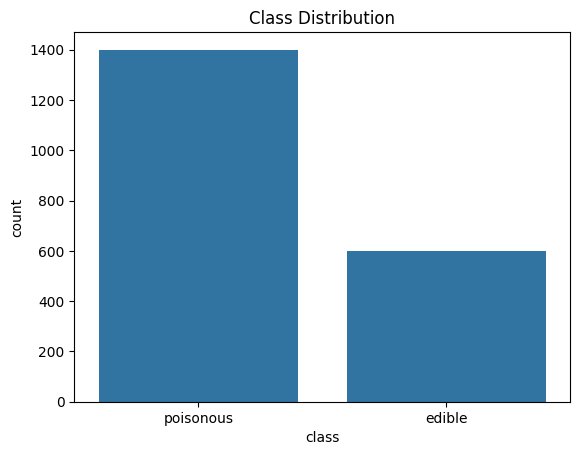

In [77]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

Encode categorical variables

In [78]:

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)


Heatmap of correlations

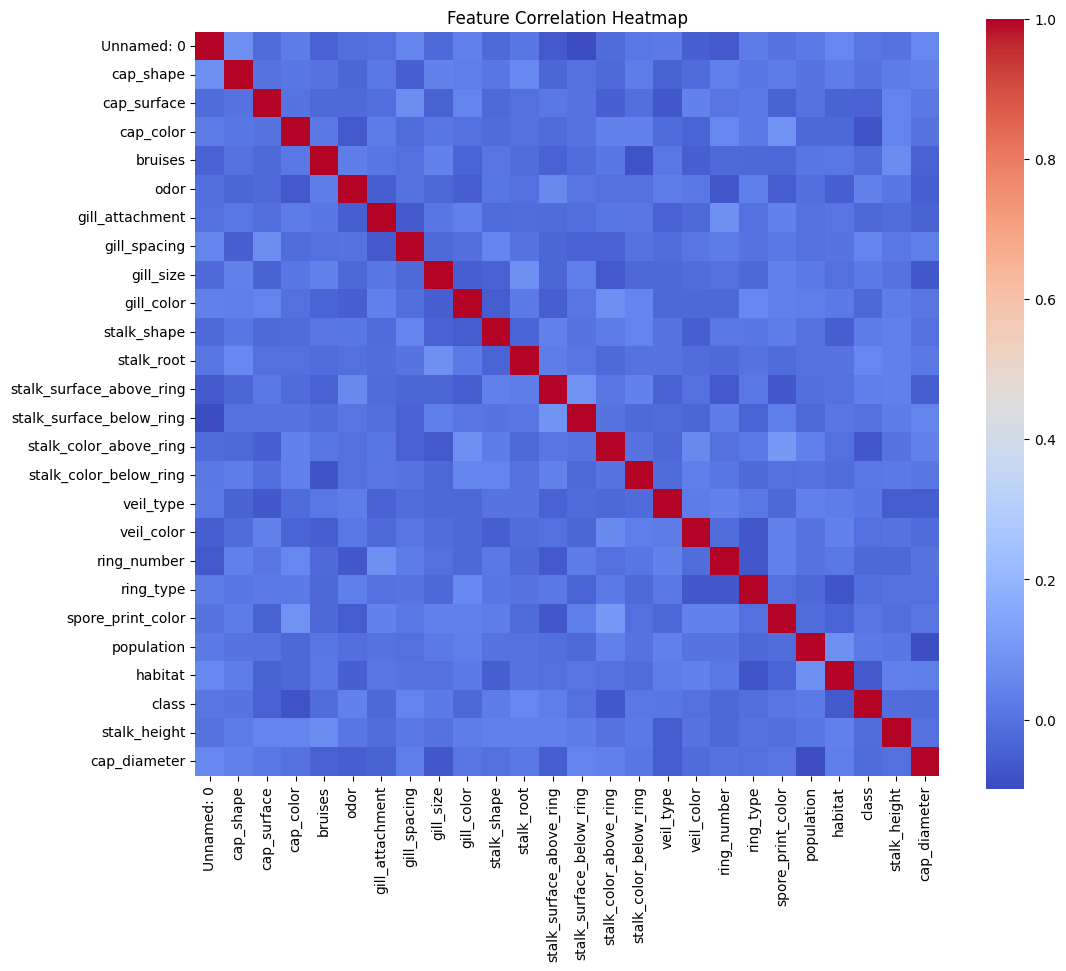

In [79]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Split dataset

In [80]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 SVM model

In [81]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Model Evaluation

In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6675


In [83]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [84]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[  0 133]
 [  0 267]]


Visualize decision boundaries

In [85]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


In [86]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

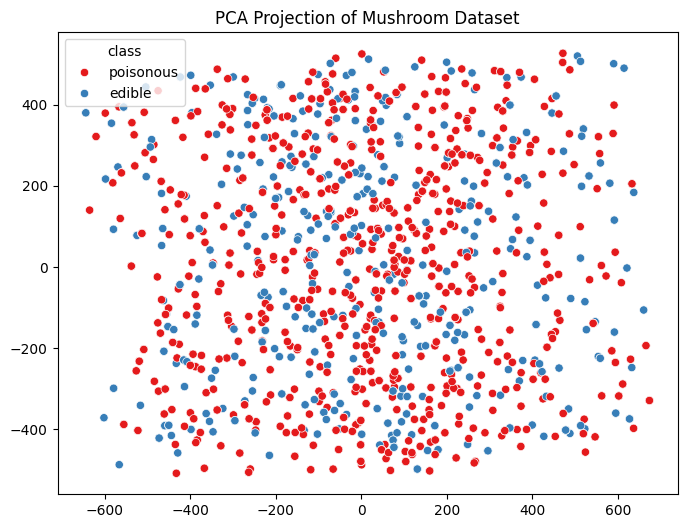

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['class'], palette='Set1')
plt.title('PCA Projection of Mushroom Dataset')
plt.show()

In [88]:
model_2d = SVC(kernel='rbf')
model_2d.fit(X_train_pca, y_train_pca)


SVC()

Plotting

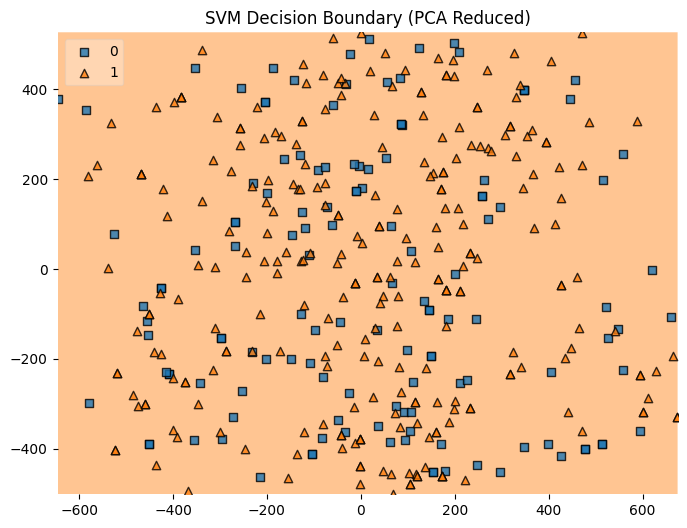

In [89]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test_pca, y_test_pca.values, clf=model_2d, legend=2)
plt.title('SVM Decision Boundary (PCA Reduced)')
plt.show()


In [90]:
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, pred))


Kernel: linear
Accuracy: 0.6675

Kernel: rbf
Accuracy: 0.6675

Kernel: poly
Accuracy: 0.6675
